In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier, plot_importance

In [2]:
#load the dataset
df = pd.read_csv("Autism Screening.csv")

In [3]:
#load first few rows of data
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [5]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [6]:
df.duplicated().sum()

5

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [9]:
df.rename(columns = {'austim': 'family_related_autism', 'Class/ASD':'has_autism'}, inplace = True)

In [10]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[df['age'] == 383, 'age'] = np.nan
median_age = df['age'].median()
df['age'].fillna(median_age, inplace = True)
df['age'] = df['age'].astype('int')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_19608\335685876.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace = True)


In [11]:
df['jundice'] = df['jundice'].map(lambda x: 1 if x == 'yes' else 0)
df['family_related_autism'] = df['family_related_autism'].map(lambda x: 1 if x == 'yes' else 0)
df['used_app_before'] = df['used_app_before'].map(lambda x: 1 if x == 'yes' else 0)
df['gender'] = df['gender'].map(lambda x: 1 if x == 'm' else 0)
df['has_autism'] = df['has_autism'].map(lambda x: 1 if x == 'YES' else 0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   A1_Score               699 non-null    int64 
 1   A2_Score               699 non-null    int64 
 2   A3_Score               699 non-null    int64 
 3   A4_Score               699 non-null    int64 
 4   A5_Score               699 non-null    int64 
 5   A6_Score               699 non-null    int64 
 6   A7_Score               699 non-null    int64 
 7   A8_Score               699 non-null    int64 
 8   A9_Score               699 non-null    int64 
 9   A10_Score              699 non-null    int64 
 10  age                    699 non-null    int32 
 11  gender                 699 non-null    int64 
 12  ethnicity              699 non-null    object
 13  jundice                699 non-null    int64 
 14  family_related_autism  699 non-null    int64 
 15  contry_of_res          699 n

In [13]:
df['ethnicity'].value_counts()

ethnicity
White-European       230
Asian                123
?                     95
'Middle Eastern '     90
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: count, dtype: int64

In [14]:
df['contry_of_res'].value_counts()

contry_of_res
'United States'           111
'New Zealand'              81
India                      81
'United Arab Emirates'     80
'United Kingdom'           76
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: count, Length: 67, dtype: int64

In [15]:
df['relation'].value_counts()

relation
Self                          519
?                              95
Parent                         50
Relative                       26
Others                          5
'Health care professional'      4
Name: count, dtype: int64

In [16]:
df['ethnicity'] = df['ethnicity'].str.replace("'", "").str.strip()
df['contry_of_res'] = df['contry_of_res'].str.replace("'", "").str.strip()
df['relation'] = df['relation'].str.replace("'", "").str.strip()

In [17]:
df.loc[df['ethnicity'] == '?', 'ethnicity'] = np.nan
df.loc[df['relation'] == '?', 'relation'] = np.nan

In [18]:
df['ethnicity'] = df['ethnicity'].fillna('Unknown')
df['relation'] = df['relation'].fillna('Unknown')

In [19]:
df.drop(columns='age_desc', inplace=True)

In [20]:
df = pd.get_dummies(df, columns=['ethnicity', 'contry_of_res', 'relation'], dtype = 'int')

<Axes: >

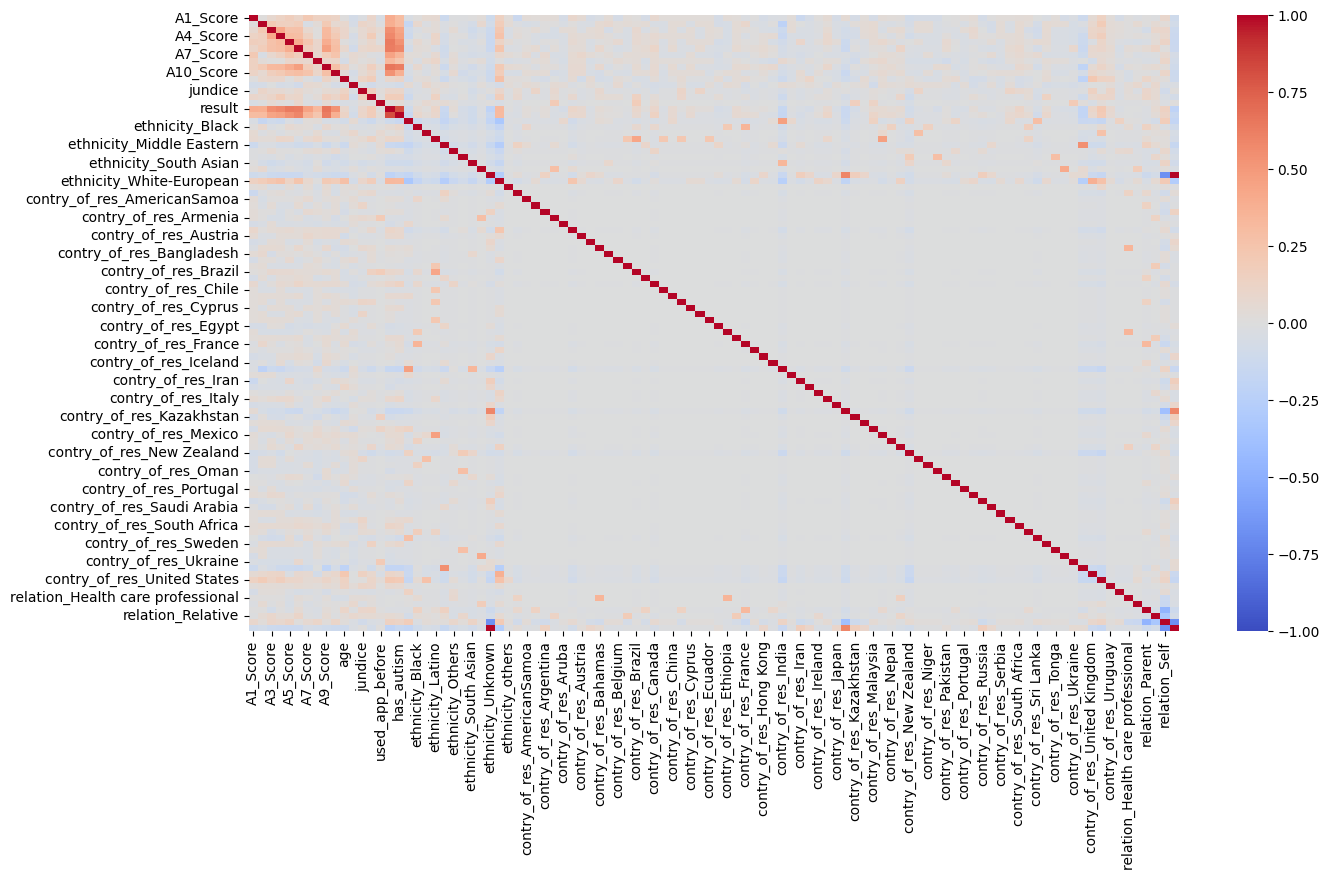

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap = 'coolwarm')

In [22]:
sorted_corr = df.corr()['has_autism'].abs().sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
dropped_cols = sorted_corr.iloc[:num_cols_to_drop].index
df_dropped = df.drop(columns = dropped_cols)

<Axes: >

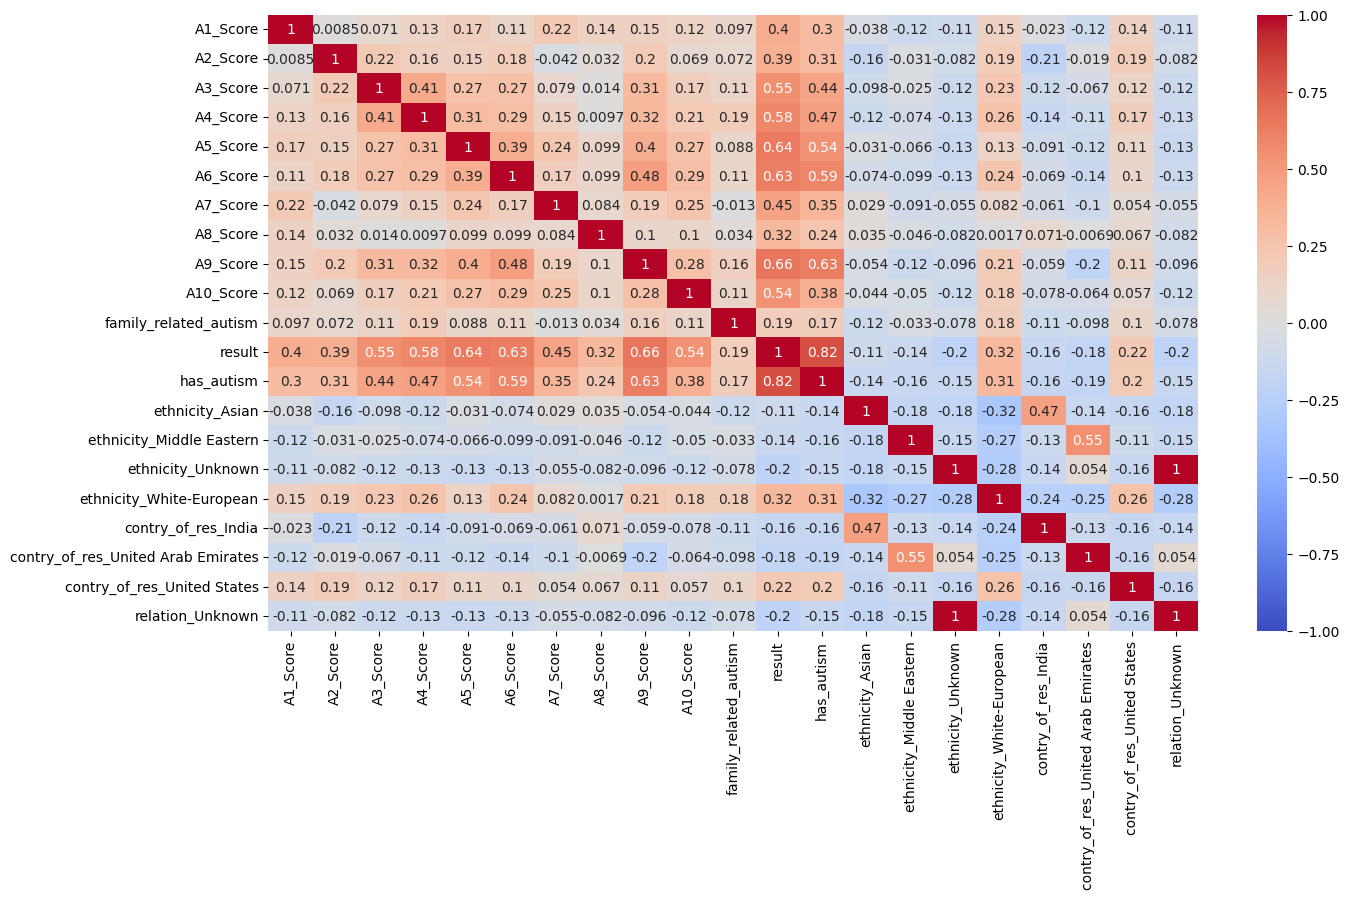

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dropped.corr(), annot = True, vmin=-1, vmax=1, cmap = 'coolwarm')

In [24]:
X = df.drop(columns = 'has_autism')
y = df['has_autism']
df['has_autism'].value_counts(normalize=True)

has_autism
0    0.732475
1    0.267525
Name: proportion, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, stratify = y, random_state=42)

In [26]:
rfc = RandomForestClassifier()

param_grid = {'n_estimators':[50, 150, 250],
              'max_features':[25,50,75],
              'max_depth':[None, 70, 100]}

scoring = ['accuracy', 'recall', 'precision', 'f1']

rfc_cv = GridSearchCV(rfc, param_grid, cv = 5, scoring = scoring, refit = 'f1')

In [27]:
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 70, 100],
                         'max_features': [25, 50, 75],
                         'n_estimators': [50, 150, 250]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [28]:
y_pred = rfc_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
importances = rfc_cv.best_estimator_.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame(list(zip(features, importances)), columns=['Feautre', 'Importance'])
feature_importance.sort_values('Importance', ascending=False, inplace=True)
feature_importance

,Feautre,Importance
15,result,0.482697
8,A9_Score,0.154846
5,A6_Score,0.096520
2,A3_Score,0.062573
1,A2_Score,0.043231
...,...,...
64,contry_of_res_Jordan,0.000000
65,contry_of_res_Kazakhstan,0.000000
66,contry_of_res_Lebanon,0.000000
67,contry_of_res_Malaysia,0.000000


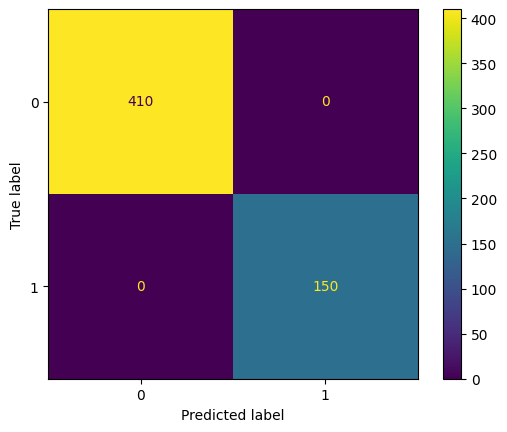

In [30]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [32]:
xgb = XGBClassifier()

xgb_param_grid = {'n_estimators':[100,200,300],
              'eta':[.1,.2,.3],
              'max_depth':[6, 10, 15],
              'min_child_weight':[5, 6]}

xgb_cv = GridSearchCV(xgb, xgb_param_grid, cv = 5, scoring = scoring, refit='f1')

xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3], 'max_depth': [6, 10, 15],
                         'min_child_weight': [5, 6],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [37]:
xgb_y_pred = xgb_cv.predict(X_test)
xgb_cv_acc = accuracy_score(y_test, xgb_y_pred)
xgb_cv_prec = precision_score(y_test, xgb_y_pred)
xgb_cv_rc = recall_score(y_test, xgb_y_pred)
xgb_cv_f1 = f1_score(y_test, xgb_y_pred)

In [42]:
print(xgb_cv_acc)
print(xgb_cv_prec)
print(xgb_cv_rc)
print(xgb_cv_f1)

1.0
1.0
1.0
1.0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

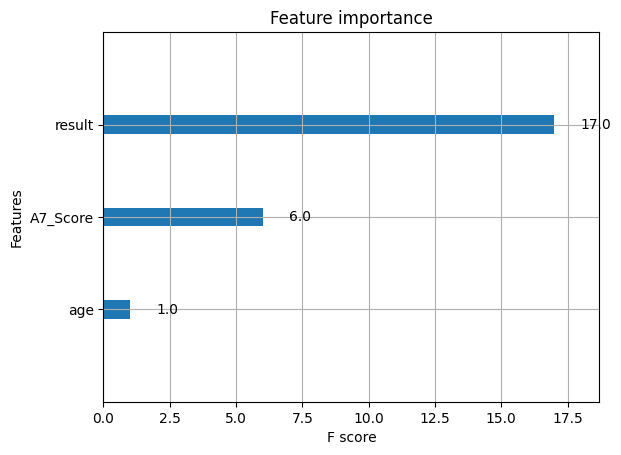

In [47]:
plot_importance(xgb_cv.best_estimator_)

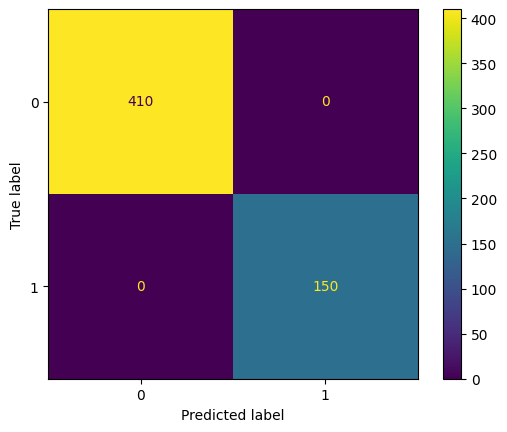

In [46]:
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
ConfusionMatrixDisplay(xgb_cm).plot()